<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/AnalisisConjunto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Sistema_Ingestion': ['Tabletas', 'Suspension', 'Tabletas', 'Suspension', 'Tabletas',
                          'Tabletas', 'Suspension', 'Tabletas', 'Suspension', 'Tabletas',
                          'Suspension', 'Tabletas', 'Tabletas', 'Suspension', 'Tabletas',
                          'Suspension', 'Tabletas', 'Suspension', 'Tabletas', 'Suspension',
                          'Tabletas', 'Suspension', 'Tabletas', 'Suspension', 'Tabletas'],
    'Posologia': ['Diaria', 'Frecuente', 'Diaria', 'Diaria', 'Frecuente',
                  'Diaria', 'Frecuente', 'Diaria', 'Frecuente', 'Diaria',
                  'Diaria', 'Frecuente', 'Diaria', 'Frecuente', 'Diaria',
                  'Diaria', 'Frecuente', 'Diaria', 'Diaria', 'Frecuente',
                  'Diaria', 'Frecuente', 'Diaria', 'Diaria', 'Frecuente'],
    'Precio': ['Bajo', 'Medio', 'Alto', 'Bajo', 'Bajo',
               'Medio', 'Alto', 'Bajo', 'Medio', 'Alto',
               'Bajo', 'Medio', 'Bajo', 'Alto', 'Bajo',
               'Alto', 'Bajo', 'Bajo', 'Alto', 'Medio',
               'Bajo', 'Bajo', 'Alto', 'Medio', 'Alto'],
    'Recomendacion': [5, 4, 3, 5, 4,
                      4, 2, 5, 3, 3,
                      4, 4, 5, 2, 4,
                      5, 3, 4, 1, 5,
                      2, 4, 5, 3, 4]
}

df = pd.DataFrame(data)
df


,Sistema_Ingestion,Posologia,Precio,Recomendacion
0,Tabletas,Diaria,Bajo,5
1,Suspension,Frecuente,Medio,4
2,Tabletas,Diaria,Alto,3
3,Suspension,Diaria,Bajo,5
4,Tabletas,Frecuente,Bajo,4
5,Tabletas,Diaria,Medio,4
6,Suspension,Frecuente,Alto,2
7,Tabletas,Diaria,Bajo,5
8,Suspension,Frecuente,Medio,3
9,Tabletas,Diaria,Alto,3


In [19]:
# Verificación y limpieza de datos
print("Valores únicos en Posologia:", df['Posologia'].unique())  # Verificar posibles errores tipográficos

# Codificación de variables categóricas
dummies = pd.get_dummies(df, columns=['Sistema_Ingestion', 'Posologia', 'Precio'], drop_first=True)
X = dummies.drop('Recomendacion', axis=1)
y = df['Recomendacion']

# Convert all columns in X to numeric dtype
X = X.astype(float)

# Modelo de regresión lineal
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# Resultados del modelo
print("\nResumen del modelo:")
print(modelo.summary())



Valores únicos en Posologia: ['Diaria' 'Frecuente']

Resumen del modelo:
                            OLS Regression Results                            
Dep. Variable:          Recomendacion   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9996
Date:                Sat, 22 Feb 2025   Prob (F-statistic):              0.431
Time:                        16:41:54   Log-Likelihood:                -35.900
No. Observations:                  25   AIC:                             81.80
Df Residuals:                      20   BIC:                             87.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [21]:
# Cálculo de utilidades parciales
utilidades = {
    'Sistema_Ingestion': {
        'Tabletas': 0,  # Categoría de referencia
        'Suspension': modelo.params.get('Sistema_Ingestion_Suspension', 0)
    },
    'Posologia': {
        'Diaria': 0,  # Categoría de referencia
        'Frecuente': modelo.params.get('Posologia_Frecuente', 0)
    },
    'Precio': {
        'Alto': 0,  # Categoría de referencia
        'Medio': modelo.params.get('Precio_Medio', 0),
        'Bajo': modelo.params.get('Precio_Bajo', 0)
    }
}

# Cálculo de importancia relativa
rangos = {
    'Sistema_Ingestion': abs(utilidades['Sistema_Ingestion']['Suspension'] - utilidades['Sistema_Ingestion']['Tabletas']),
    'Posologia': abs(utilidades['Posologia']['Frecuente'] - utilidades['Posologia']['Diaria']),
    'Precio': max(utilidades['Precio']['Bajo'], utilidades['Precio']['Medio'], 0) -
              min(utilidades['Precio']['Bajo'], utilidades['Precio']['Medio'], 0)
}

total_rango = sum(rangos.values())
importancia = {atributo: (rangos[atributo]/total_rango)*100 for atributo in rangos}

# Visualización de resultados
print("\nUtilidades parciales:")
for atributo in utilidades:
    print(f"\n{atributo}:")
    for nivel, utilidad in utilidades[atributo].items():
        print(f"  {nivel}: {utilidad:.2f}")

print("\nImportancia relativa de los atributos:")
for atributo, valor in importancia.items():
    print(f"{atributo}: {valor:.2f}%")




Utilidades parciales:

Sistema_Ingestion:
  Tabletas: 0.00
  Suspension: 0.00

Posologia:
  Diaria: 0.00
  Frecuente: -0.38

Precio:
  Alto: 0.00
  Medio: 0.80
  Bajo: 0.93

Importancia relativa de los atributos:
Sistema_Ingestion: 0.00%
Posologia: 29.07%
Precio: 70.93%


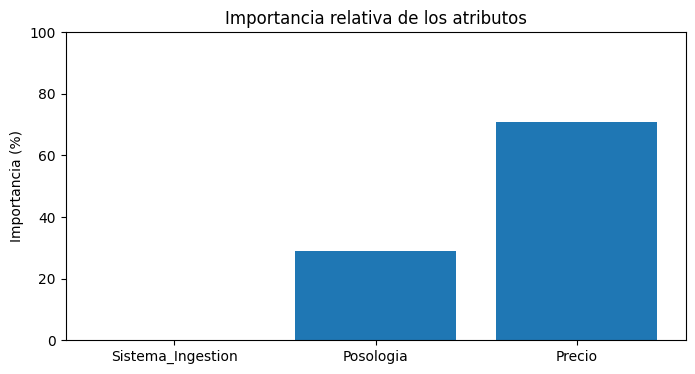

In [22]:
# Gráfico de importancia
plt.figure(figsize=(8,4))
plt.bar(importancia.keys(), importancia.values())
plt.title('Importancia relativa de los atributos')
plt.ylabel('Importancia (%)')
plt.ylim(0, 100)
plt.show()